##2.DATA CLEANING

####Split data

In [ ]:
# split data into train and test
X_train, X_test= train_test_split(df, test_size=0.20, random_state=42)

In [ ]:
print(X_test.shape)
print(X_train.shape)

(448, 27)
(1792, 27)


####2.1.Missing Data

In [ ]:
X_train.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 19
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [ ]:
X_train[X_train['Income'].isnull() == True].agg({'Education':'value_counts'})

,Education
Graduation,8
Master,4
PhD,4
2n Cycle,3


In [ ]:
X_train.groupby('Education')['Income'].mean()

Education
2n Cycle     47387.78
Basic        20359.88
Graduation   52631.37
Master       52243.38
PhD          55558.28
Name: Income, dtype: float64

In [ ]:
# to impute by mean income of education category  ?
X_train['Income'].fillna(X_train.groupby('Education')['Income'].transform('mean'), inplace=True)

In [ ]:
X_test.groupby('Education')['Income'].mean()

Education
2n Cycle     48529.21
Basic        20096.64
Graduation   53102.12
Master       55138.29
PhD          58594.46
Name: Income, dtype: float64

In [ ]:
X_test['Income'].fillna(X_test.groupby('Education')['Income'].transform('mean'), inplace=True)

In [ ]:
print(X_train.isnull().values.any())
print(X_test.isnull().values.any())

False
False


####2.2.Duplicate Data

In [ ]:
print(X_train.duplicated().sum())
print(X_test.duplicated().sum())

0
0


####2.3.Detection of Outliers – IQR approach

In [ ]:
def report(df, col_name):
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(14,4)
    fig.suptitle(col_name, fontsize=14)
    sns.histplot(data=df, x=col_name, kde=True, ax=ax[0])
    sns.boxplot(data=df, x=col_name, ax=ax[1])
    plt.show()

    print(df[col_name].describe())
    print(f'Skewness  {df[col_name].skew()}')

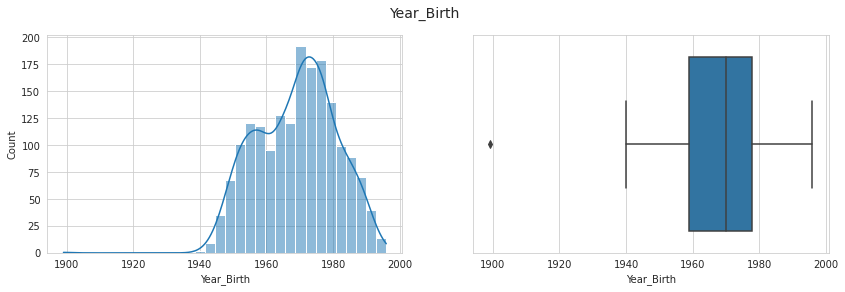

count   1792.00
mean    1968.96
std       11.88
min     1899.00
25%     1959.00
50%     1970.00
75%     1978.00
max     1996.00
Name: Year_Birth, dtype: float64
Skewness  -0.20000435261185465


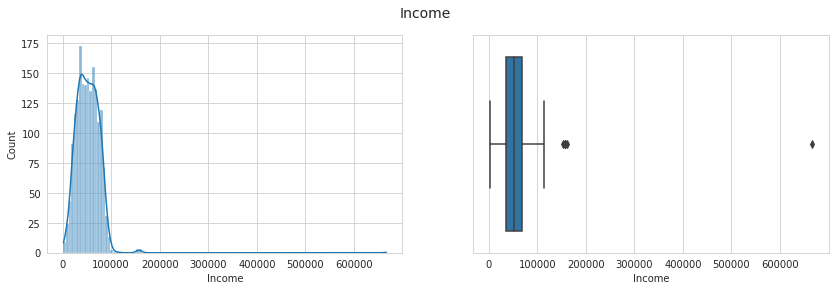

count     1792.00
mean     51967.59
std      26014.94
min       1730.00
25%      35125.50
50%      51144.50
75%      67817.25
max     666666.00
Name: Income, dtype: float64
Skewness  7.557699307667873


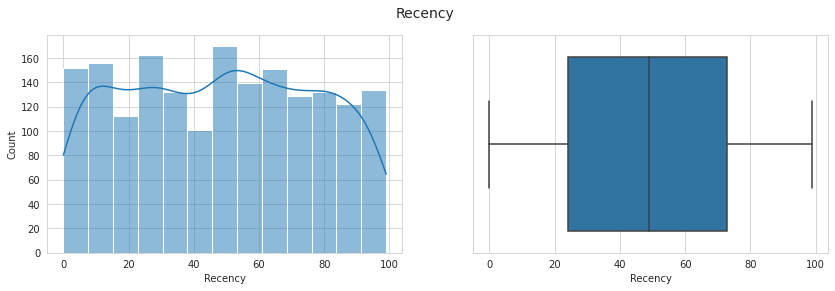

count   1792.00
mean      48.43
std       28.70
min        0.00
25%       24.00
50%       49.00
75%       73.00
max       99.00
Name: Recency, dtype: float64
Skewness  0.010755617752651752


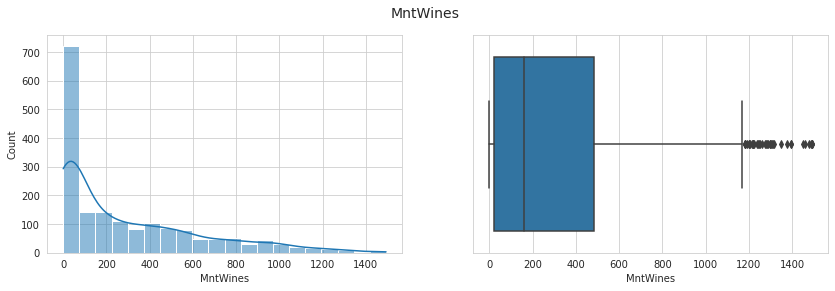

count   1792.00
mean     295.08
std      334.55
min        0.00
25%       23.00
50%      162.50
75%      483.00
max     1493.00
Name: MntWines, dtype: float64
Skewness  1.233436198343044


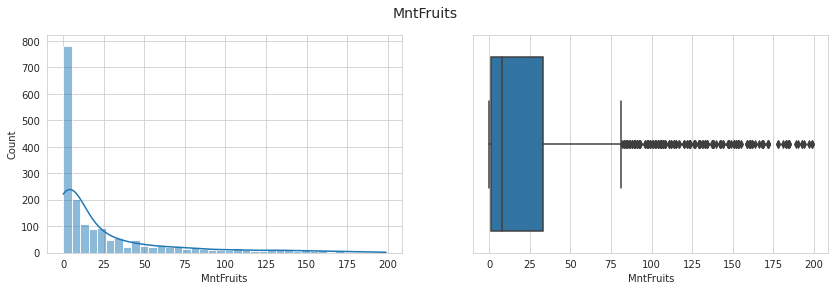

count   1792.00
mean      26.57
std       40.37
min        0.00
25%        1.00
50%        8.00
75%       33.00
max      199.00
Name: MntFruits, dtype: float64
Skewness  2.0835533301675975


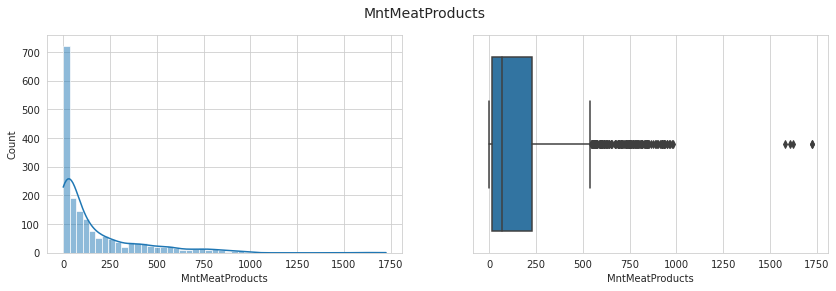

count   1792.00
mean     167.19
std      229.85
min        0.00
25%       15.00
50%       65.50
75%      226.50
max     1725.00
Name: MntMeatProducts, dtype: float64
Skewness  2.150933871735895


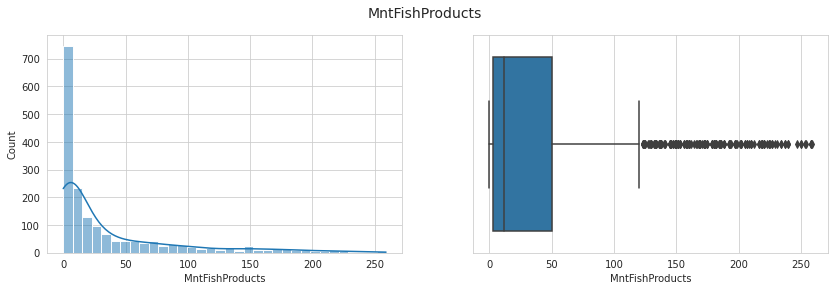

count   1792.00
mean      37.46
std       54.43
min        0.00
25%        3.00
50%       12.00
75%       50.00
max      259.00
Name: MntFishProducts, dtype: float64
Skewness  1.918950741430617


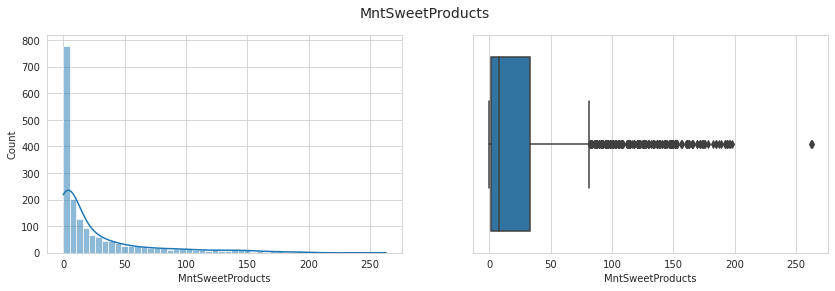

count   1792.00
mean      27.00
std       41.27
min        0.00
25%        1.00
50%        8.00
75%       33.00
max      263.00
Name: MntSweetProducts, dtype: float64
Skewness  2.1345837359845383


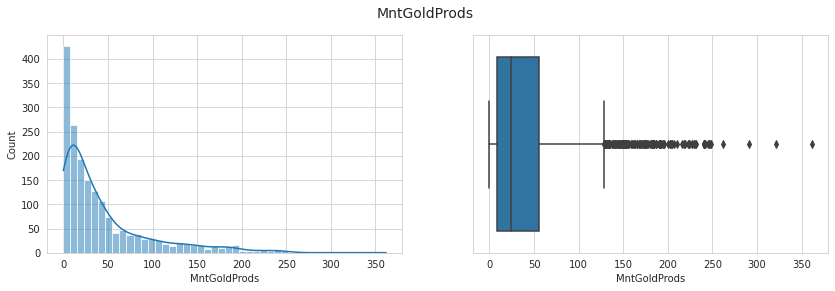

count   1792.00
mean      43.71
std       52.11
min        0.00
25%        8.00
50%       24.00
75%       56.00
max      362.00
Name: MntGoldProds, dtype: float64
Skewness  1.9223197116423978


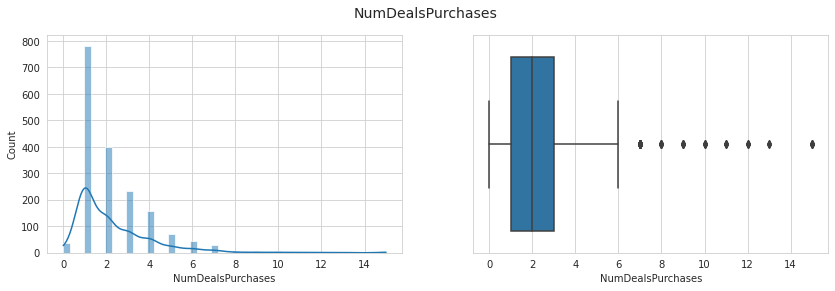

count   1792.00
mean       2.31
std        1.93
min        0.00
25%        1.00
50%        2.00
75%        3.00
max       15.00
Name: NumDealsPurchases, dtype: float64
Skewness  2.548470040083873


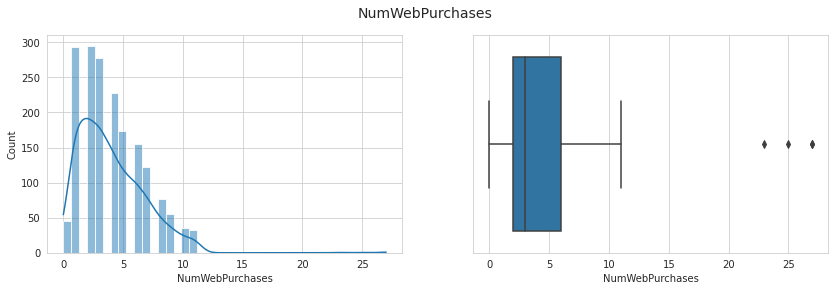

count   1792.00
mean       4.01
std        2.80
min        0.00
25%        2.00
50%        3.00
75%        6.00
max       27.00
Name: NumWebPurchases, dtype: float64
Skewness  1.5693581867391042


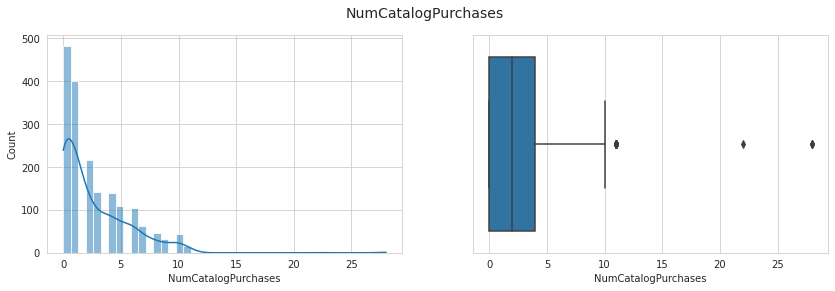

count   1792.00
mean       2.66
std        3.00
min        0.00
25%        0.00
50%        2.00
75%        4.00
max       28.00
Name: NumCatalogPurchases, dtype: float64
Skewness  2.011611501197344


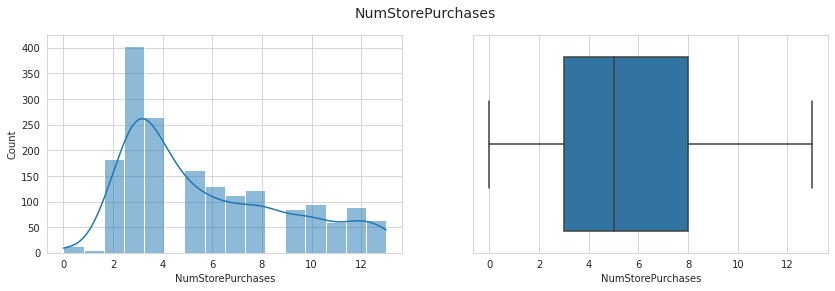

count   1792.00
mean       5.74
std        3.26
min        0.00
25%        3.00
50%        5.00
75%        8.00
max       13.00
Name: NumStorePurchases, dtype: float64
Skewness  0.7163257734016655


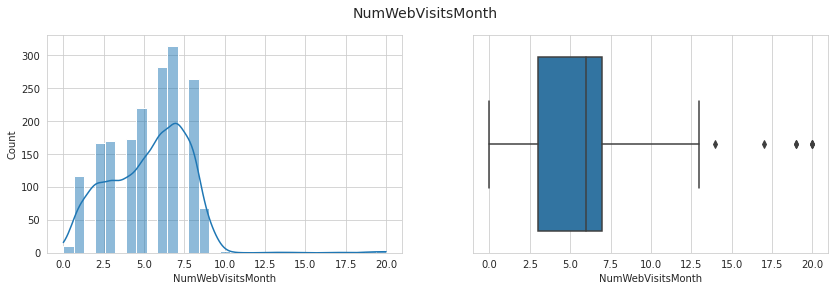

count   1792.00
mean       5.31
std        2.45
min        0.00
25%        3.00
50%        6.00
75%        7.00
max       20.00
Name: NumWebVisitsMonth, dtype: float64
Skewness  0.31438498475024057


In [ ]:
for not col in num_cols:
    else:
      report(X_train, col)

In [ ]:
def grab_outliers(dataframe, col_name):
  df_col_name = dataframe[col_name]

  # to define upper and lower outlier boundaries by third and first quartiles
  Q1 = df_col_name.quantile(0.25)
  Q3 = df_col_name.quantile(0.75)
  IQR = Q3-Q1 
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR

  outliers = (df_col_name < lower_bound) | (df_col_name > upper_bound) 
  outliers_index = df_col_name[outliers].index

  print(f"{col_name} variable\n"
        f"Outliers boundaries: {lower_bound}, {upper_bound}\n"
        f"Number of outliers : {len(outliers_index)}")

  return col_name, lower_bound, upper_bound, outliers_index

In [ ]:
def capping_outliers(df, col_name, outliers_index, bound):
  df[col_name][outliers_index] = bound
  return df

In [ ]:
num_cols

['ID',
 'Year_Birth',
 'Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

#####Year_Birth variable

In [ ]:
df_col_name, lower_bound, upper_bound, outliers_index = grab_outliers(X_train, 'Year_Birth')

Year_Birth variable
Outliers boundaries: 1930.5, 2006.5
Number of outliers : 1


In [ ]:
X_train.loc[outliers_index,:]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
339,1150,1899,PhD,Together,83532.00,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0


In [ ]:
# There is just one outlier in the variable year_birth, these could be data entry errors. 
# Therefore, these were excluded from the analysis.
X_train.drop(index=(outliers_index), inplace=True)

In [ ]:
df_col_name, lower_bound, upper_bound, outliers_index = grab_outliers(X_test, 'Year_Birth')

Year_Birth variable
Outliers boundaries: 1932.0, 2004.0
Number of outliers : 2


In [ ]:
X_test.drop(index=(outliers_index), inplace=True)

#####Income variable outliers detection

In [ ]:
df_col_name, lower_bound, upper_bound, outliers_index = grab_outliers(X_train, 'Income')

Income variable
Outliers boundaries: -13944.0, 116768.0
Number of outliers : 7


In [ ]:
X_train[X_train.Income < 0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


In [ ]:
# The column has a right-skewed distribution, so the outliers are replaced by the upper bound
X_train = capping_outliers(X_train, 'Income', outliers_index, upper_bound)

<ipython-input-44-e46843775cc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][outliers_index] = bound


In [ ]:
df_col_name, lower_bound, upper_bound, outliers_index = grab_outliers(X_test, 'Income')

Income variable
Outliers boundaries: -11630.5, 118205.5
Number of outliers : 1


In [ ]:
X_test = capping_outliers(X_test, 'Income', outliers_index, upper_bound)

<ipython-input-44-e46843775cc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][outliers_index] = bound
